In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

# Comparing catalogue (vG+2023)

In [2]:
df_vg =  pd.read_csv('Catalogues/NGC2539_vG2023+GaiaDR3.csv')
df_vg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,5725183060454307840,122.543457,-13.441126,0.5316,-2.749,-0.215,19.453873,19.289522,18.325554,NGC_2539,...,NaN,NaN,NaN,NaN,122.543469,-13.441125,5.009369,3.603222,0.0699,0.0
1,5725182953073887360,122.514357,-13.457342,0.6788,-2.414,0.028,18.965633,19.964792,17.986687,NGC_2539,...,0.0486,0.0150,0.1002,PHOENIX,122.514368,-13.457342,3.510630,2.398008,0.0564,0.0
2,5725180723992144256,122.446022,-13.534858,0.7080,-2.336,-0.247,18.992800,19.908337,18.105816,NGC_2539,...,0.0138,0.0043,0.0281,MARCS,122.446032,-13.534857,3.623407,2.351267,0.0357,0.0
3,5725178696767530112,122.620965,-13.510299,0.6625,-2.193,-0.258,18.503292,19.363157,17.563908,NGC_2539,...,0.2539,0.2363,0.2768,MARCS,122.620975,-13.510297,2.765433,1.990795,0.0404,0.0
4,5725178314509097728,122.539048,-13.547586,0.7476,-1.777,-0.625,18.062864,18.826242,17.112633,NGC_2539,...,0.1028,0.0777,0.1289,PHOENIX,122.539056,-13.547583,1.923987,1.365186,0.0493,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,5725970276418851328,122.103406,-13.064577,0.7605,-2.301,-0.531,13.934523,14.170032,13.552169,NGC_2539,...,0.0923,0.0878,0.0962,A,122.103416,-13.064574,0.297504,0.191861,0.0588,0.0
1135,5725112794788207744,122.846499,-13.754821,0.7201,-1.988,-0.638,17.717495,18.519274,16.835249,NGC_2539,...,0.2831,0.2700,0.2987,PHOENIX,122.846508,-13.754818,1.612267,1.417754,0.0109,0.0
1136,5725107980125916416,122.916747,-13.856385,0.6776,-2.218,-0.192,15.150477,15.475309,14.663897,NGC_2539,...,0.0460,0.0417,0.0515,MARCS,122.916757,-13.856384,0.470797,0.366977,-0.0176,0.0
1137,5725191165050219392,122.131967,-13.494460,0.3708,-2.558,-0.637,19.609621,20.761806,18.539328,NGC_2539,...,NaN,NaN,NaN,NaN,122.131979,-13.494457,5.168311,4.066477,-0.1379,0.0


In [3]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [4]:
dfvg

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
11,5725169724574250368,122.436369,-13.687641,0.7825,-2.457,-0.398,17.591800,18.290110,16.808563,NGC_2539,...,0.1052,0.0894,0.1184,MARCS,122.436381,-13.687639,1.402404,1.034618,0.0442,0.0
13,5725168079608466304,122.443245,-13.765486,0.7389,-2.559,-0.370,14.012406,14.255021,13.619826,NGC_2539,...,0.1246,0.1218,0.1275,MARCS,122.443256,-13.765484,0.274634,0.186572,0.0871,0.0
21,5725195086362592896,122.480864,-13.408580,0.7372,-2.286,-0.556,13.472965,13.666136,13.149684,NGC_2539,...,0.0885,0.0840,0.0940,MARCS,122.480874,-13.408578,0.212803,0.163630,0.0082,0.0
22,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,...,0.0146,0.0060,0.0236,MARCS,122.876584,-13.863222,0.654409,0.478973,-0.0070,0.0
29,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,...,0.0647,0.0564,0.0725,MARCS,123.007691,-13.927758,0.529302,0.490049,-0.1401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,5725969932821520640,122.008902,-13.098581,0.8245,-2.080,-0.492,17.025606,17.619530,16.305689,NGC_2539,...,0.0362,0.0095,0.0598,PHOENIX,122.008911,-13.098578,1.357902,0.901828,-0.1079,0.0
1123,5725956017127403648,122.250761,-13.170479,0.7394,-2.347,-0.421,14.926690,15.240170,14.442820,NGC_2539,...,0.0476,0.0362,0.0593,MARCS,122.250772,-13.170477,0.426359,0.282829,0.0948,0.0
1128,5725951241123812224,122.222086,-13.293557,0.8289,-2.344,-0.535,17.370806,18.019985,16.611818,NGC_2539,...,0.0586,0.0471,0.0704,PHOENIX,122.222096,-13.293555,1.356928,0.943008,0.0388,0.0
1131,5726426088409609600,123.504827,-13.744042,0.8378,-2.243,-0.433,17.197863,17.890827,16.414024,NGC_2539,...,0.1149,0.0969,0.1387,PHOENIX,123.504837,-13.744040,1.332593,1.539109,-0.2364,0.0


# 5 Populations

In [5]:
p1 = pd.read_csv('Catalogues/pop1_NGC2539_Kmeans1.csv')
p2 = pd.read_csv('Catalogues/pop2_NGC2539_Kmeans1.csv')
p3 = pd.read_csv('Catalogues/pop3_NGC2539_Kmeans1.csv')
p4 = pd.read_csv('Catalogues/pop4_NGC2539_Kmeans1.csv')
p5 = pd.read_csv('Catalogues/pop5_NGC2539_Kmeans1.csv')

## Computing Completeness and Purity

### Population 1

In [6]:
ra1 = p1.RAJ2000
dec1 = p1.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [7]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [8]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [9]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [10]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [11]:
p1.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
1030,122.613684,-13.354445,-2.496,-0.405,17.577665,1.474958,0.6572,0
1044,122.794199,-13.264224,-2.234,-0.477,17.765870,1.520018,0.7009,0
1047,122.921408,-13.185990,-2.260,-0.563,17.271206,1.484058,0.6139,0
1056,122.549542,-13.242215,-2.293,-0.495,17.439474,1.439741,0.6904,0
1062,122.425783,-13.241584,-2.426,-0.640,17.896448,1.618706,0.6523,0
...,...,...,...,...,...,...,...,...
1587,122.451479,-12.397480,-2.256,-0.533,17.459036,1.450329,0.7113,0
1589,122.620914,-12.321530,-2.330,-0.624,17.048920,1.360680,0.7158,0
1621,122.992007,-12.532405,-2.250,-0.511,17.371698,1.392717,0.6888,0
1651,122.764247,-12.387402,-2.350,-0.678,16.585200,1.124636,0.7514,0


In [12]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
87,5726685229554458112,122.613672,-13.354446,0.6572,-2.496,-0.405,17.577665,18.265543,16.790585,NGC_2539,...,0.1043,0.0924,0.1180,MARCS,122.613684,-13.354445,1.387548,1.106300,-0.0592,0.0
75,5726692410740033920,122.794188,-13.264226,0.7009,-2.234,-0.477,17.765870,18.483799,16.963781,NGC_2539,...,0.1906,0.1813,0.2020,PHOENIX,122.794199,-13.264224,1.617851,1.693961,-0.0468,0.0
460,5726694747202461312,122.921398,-13.185993,0.6139,-2.260,-0.563,17.271206,17.964739,16.480680,NGC_2539,...,0.0242,0.0081,0.0464,PHOENIX,122.921408,-13.185990,1.347161,1.574631,-0.2840,0.0
452,5726699974179527168,122.549531,-13.242217,0.6904,-2.293,-0.495,17.439474,18.097500,16.657759,NGC_2539,...,0.0407,0.0287,0.0542,MARCS,122.549542,-13.242215,1.213463,0.915606,-0.0147,0.0
446,5726702409422712192,122.425772,-13.241586,0.6523,-2.426,-0.640,17.896448,18.671953,17.053247,NGC_2539,...,0.2026,0.1927,0.2139,PHOENIX,122.425783,-13.241584,1.684238,1.185332,0.0136,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,5727568657087244672,122.451468,-12.397482,0.7113,-2.256,-0.533,17.459036,18.138662,16.688334,NGC_2539,...,0.0722,0.0620,0.0850,PHOENIX,122.451479,-12.397480,1.654529,1.270505,0.0763,0.0
602,5727570306354563712,122.620903,-12.321532,0.7158,-2.330,-0.624,17.048920,17.692509,16.331830,NGC_2539,...,0.0449,0.0329,0.0573,PHOENIX,122.620914,-12.321530,1.273273,1.235843,-0.2140,0.0
561,5727595144144875648,122.991996,-12.532407,0.6888,-2.250,-0.511,17.371698,17.979269,16.586552,NGC_2539,...,0.0486,0.0146,0.0737,PHOENIX,122.992007,-12.532405,1.526979,1.658616,-0.1996,0.0
573,5727615626847300224,122.764236,-12.387405,0.7514,-2.350,-0.678,16.585200,17.069126,15.944490,NGC_2539,...,0.0588,0.0506,0.0671,MARCS,122.764247,-12.387402,1.022060,1.069812,-0.3948,0.0


(121.2, 124.5)

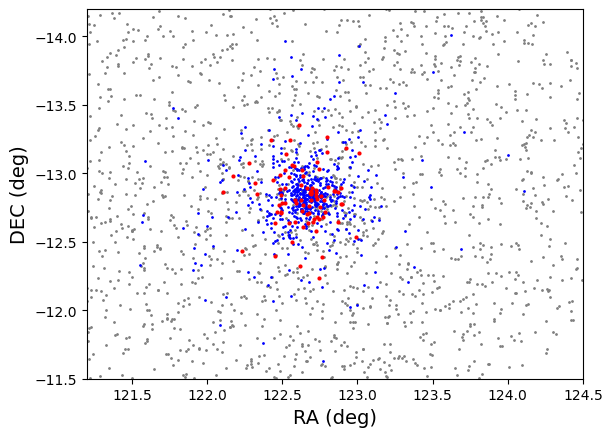

In [13]:
fig, ax = plt.subplots()

ax.scatter(p1.RAJ2000, p1.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p1.iloc[matched_idx_catalog1].RAJ2000, p1.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [14]:
dfvg_t = len(dfvg)
p1_t = len(p1.iloc[matched_idx_catalog1])

Completeness


In [15]:
p1_c = p1_t /dfvg_t
p1_c*100

12.67175572519084

Pureness

In [16]:
p1_p = p1_t/len(p1)
p1_p*100

3.6905291240551357

### Population 2

In [17]:
ra1 = p2.RAJ2000
dec1 = p2.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [18]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [19]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [20]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [21]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [22]:
p2

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,120.774810,-12.163912,-1.933,-0.784,19.835163,0.947681,0.7845,1
1,120.828872,-12.102367,-2.117,-0.285,20.013603,1.079302,0.6575,1
2,120.830706,-12.100193,-1.898,-0.170,18.199812,1.300608,0.6073,1
3,120.807029,-12.067067,-2.457,1.114,20.039885,0.902227,0.6662,1
4,120.861975,-12.067699,-1.530,-0.294,19.643790,0.814356,0.6622,1
...,...,...,...,...,...,...,...,...
2394,122.492765,-10.882078,-2.393,0.663,19.796797,1.630693,0.6680,1
2395,122.487396,-10.848242,-1.169,-0.307,14.409551,0.868863,0.5866,1
2396,122.614011,-10.853607,-0.822,1.078,17.895235,1.320318,0.6430,1
2397,122.441792,-10.867706,-2.406,0.015,18.805159,1.169334,0.5921,1


In [23]:
p2.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
679,121.568572,-12.644397,-2.301,-0.411,16.337315,1.159345,0.7057,1
1092,122.034538,-12.683238,-2.225,-0.304,15.412107,1.009403,0.7361,1
1154,121.936630,-12.556276,-1.956,-0.347,13.159049,0.446623,0.6987,1
1172,121.986930,-12.414451,-2.289,-0.518,15.343348,0.847955,0.7293,1
1185,122.452449,-12.506301,-2.348,-0.492,16.537280,1.120561,0.7295,1
1229,122.195464,-12.439109,-2.140,-0.620,16.395230,1.114319,0.6904,1
1259,122.314565,-12.239787,-2.188,-0.548,15.153848,0.832405,0.7728,1
1262,122.423167,-12.245165,-2.425,-0.599,16.628176,1.164803,0.6913,1
1294,122.678540,-12.205106,-2.376,-0.585,15.679736,0.965592,0.7160,1
1296,122.761971,-12.170666,-2.344,-0.540,13.687578,0.578143,0.7684,1


In [24]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
175,5726233197136458112,121.568561,-12.644399,0.7057,-2.301,-0.411,16.337315,16.830915,15.671571,NGC_2539,...,0.2109,0.1945,0.2333,MARCS,121.568572,-12.644397,0.675254,0.539988,-0.0818,0.0
549,5727530861375402112,122.034528,-12.683239,0.7361,-2.225,-0.304,15.412107,15.830646,14.821242,NGC_2539,...,0.0184,0.0055,0.0249,PHOENIX,122.034538,-12.683238,0.530224,0.323505,0.1587,0.0
517,5727550996182095360,121.936621,-12.556277,0.6987,-1.956,-0.347,13.159049,13.323388,12.876765,NGC_2539,...,0.1373,0.1341,0.1427,MARCS,121.936630,-12.556276,0.204810,0.140865,0.0247,0.0
585,5727556699898070144,121.986920,-12.414453,0.7293,-2.289,-0.518,15.343348,15.686052,14.838098,NGC_2539,...,0.0538,0.0444,0.0584,MARCS,121.986930,-12.414451,0.426769,0.283351,0.0607,0.0
590,5727560823067868928,122.452438,-12.506304,0.7295,-2.348,-0.492,16.537280,17.013390,15.892829,NGC_2539,...,0.0219,0.0146,0.0287,PHOENIX,122.452449,-12.506301,0.954962,0.622974,0.1635,0.0
605,5727576216229850880,122.195455,-12.439112,0.6904,-2.140,-0.620,16.395230,16.867811,15.753492,NGC_2539,...,0.0329,0.0207,0.0446,PHOENIX,122.195464,-12.439109,0.716630,0.495162,0.0169,0.0
567,5727586317992457728,122.314555,-12.239790,0.7728,-2.188,-0.548,15.153848,15.486646,14.654241,NGC_2539,...,0.0808,0.0763,0.0854,PHOENIX,122.314565,-12.239787,0.431632,0.286534,0.0356,0.0
555,5727586970827753472,122.423156,-12.245167,0.6913,-2.425,-0.599,16.628176,17.135248,15.970446,NGC_2539,...,0.0234,0.0124,0.0348,PHOENIX,122.423167,-12.245165,0.906056,0.673418,-0.0709,0.0
109,5727665959566833280,122.678529,-12.205109,0.7160,-2.376,-0.585,15.679736,16.076110,15.110518,NGC_2539,...,0.0159,0.0061,0.0257,MARCS,122.678540,-12.205106,0.620051,0.681908,-0.2811,0.0
121,5727667475692428160,122.761960,-12.170669,0.7684,-2.344,-0.540,13.687578,13.907603,13.329460,NGC_2539,...,0.1139,0.1112,0.1163,MARCS,122.761971,-12.170666,0.261382,0.270138,-0.1613,0.0


(121.2, 124.5)

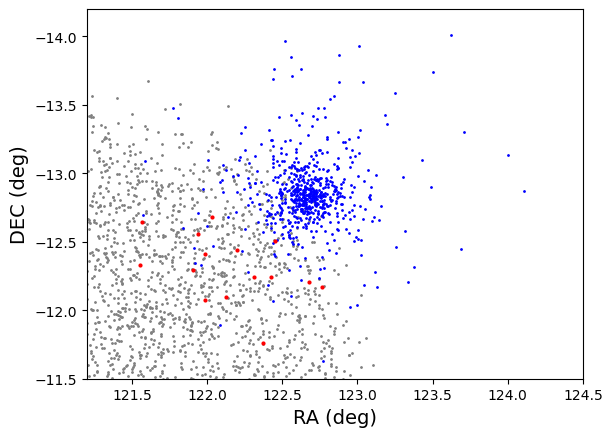

In [25]:
fig, ax = plt.subplots()

ax.scatter(p2.RAJ2000, p2.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p2.iloc[matched_idx_catalog1].RAJ2000, p2.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [26]:
dfvg_t = len(dfvg)
p2_t = len(p2.iloc[matched_idx_catalog1])

Completeness


In [27]:
p2_c = p2_t /dfvg_t
p2_c*100

2.2900763358778624

Pureness

In [28]:
p2_p = p2_t/len(p2)
p2_p*100

0.6252605252188412

### Population 3

In [29]:
ra1 = p3.RAJ2000
dec1 = p3.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [30]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [31]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [32]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [33]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [34]:
p3.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
588,123.007691,-13.927758,-2.426,-0.595,15.580099,0.927096,0.8103,2
1136,122.876584,-13.863222,-2.290,-0.747,15.763227,0.965583,0.8040,2
1163,122.516385,-13.965905,-2.239,-0.433,17.050293,1.205120,0.7145,2
1181,122.556166,-13.847287,-2.152,-0.728,15.925107,0.902498,0.7071,2
1215,122.623236,-13.760112,-2.357,-0.526,17.152250,1.338465,0.7557,2
...,...,...,...,...,...,...,...,...
2831,122.268533,-12.278189,-2.366,-0.753,12.390225,0.434379,0.8127,2
2834,123.002044,-12.521100,-2.297,-0.888,13.221190,0.525802,0.7379,2
2835,122.974850,-12.502725,-2.415,-0.592,13.150428,0.440222,0.7987,2
2836,123.025998,-12.402263,-2.419,-0.551,13.473384,0.512607,0.7531,2


In [35]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
29,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,...,0.0647,0.0564,0.0725,MARCS,123.007691,-13.927758,0.529302,0.490049,-0.1401,0.0
22,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,...,0.0146,0.0060,0.0236,MARCS,122.876584,-13.863222,0.654409,0.478973,-0.0070,0.0
1110,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,...,0.0589,0.0447,0.0840,PHOENIX,122.516385,-13.965905,1.108167,0.739725,0.0169,0.0
1106,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,...,0.0440,0.0328,0.0539,MARCS,122.556166,-13.847287,0.565617,0.409262,-0.0797,0.0
1100,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,...,0.0744,0.0603,0.0851,PHOENIX,122.623236,-13.760112,1.097271,0.788785,-0.0369,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,5727580270678519424,122.268522,-12.278193,0.8127,-2.366,-0.753,12.390225,12.549398,12.115020,NGC_2539,...,NaN,NaN,NaN,NaN,122.268533,-12.278189,0.232169,0.163726,0.1002,0.0
563,5727598133442107264,123.002034,-12.521104,0.7379,-2.297,-0.888,13.221190,13.421866,12.896065,NGC_2539,...,NaN,NaN,NaN,NaN,123.002044,-12.521100,0.261524,0.259084,-0.1740,0.0
564,5727598408320013824,122.974839,-12.502727,0.7987,-2.415,-0.592,13.150428,13.312514,12.872293,NGC_2539,...,0.1172,0.1098,0.1254,A,122.974850,-12.502725,0.279853,0.286090,-0.1431,0.0
565,5727601500696462080,123.025987,-12.402266,0.7531,-2.419,-0.551,13.473384,13.665816,13.153210,NGC_2539,...,0.1226,0.1195,0.1263,MARCS,123.025998,-12.402263,0.293414,0.241759,-0.1831,0.0


(121.2, 124.5)

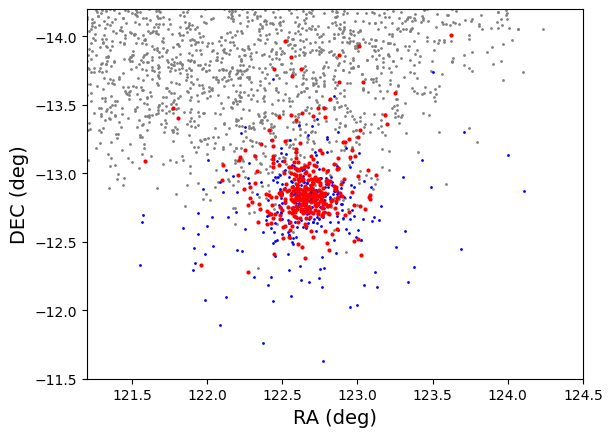

In [36]:
fig, ax = plt.subplots()

ax.scatter(p3.RAJ2000, p3.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p3.iloc[matched_idx_catalog1].RAJ2000, p3.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [37]:
dfvg_t = len(dfvg)
p3_t = len(p3.iloc[matched_idx_catalog1])

Completeness


In [38]:
p3_c = p3_t /dfvg_t
p3_c*100

52.97709923664122

Pureness

In [39]:
p3_p = p3_t/len(p3)
p3_p*100

12.222613596336739

### Population 4

In [40]:
ra1 = p4.RAJ2000
dec1 = p4.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [41]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [42]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [43]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [44]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [45]:
p4.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
375,122.436381,-13.687639,-2.457,-0.398,17.591800,1.481546,0.7825,3
419,122.252842,-13.341823,-2.476,-0.746,16.382830,1.112154,0.8430,3
604,122.222096,-13.293555,-2.344,-0.535,17.370806,1.408167,0.8289,3
640,122.008911,-13.098578,-2.080,-0.492,17.025606,1.313841,0.8245,3
759,121.572847,-12.695077,-2.288,-0.530,17.874983,1.715794,0.7872,3
...,...,...,...,...,...,...,...,...
1770,122.749552,-12.298490,-2.276,-0.582,16.656437,1.181709,0.7921,3
1790,123.339256,-12.204826,-2.510,-0.721,17.277050,1.438326,0.8095,3
1934,121.916191,-12.341736,-2.201,-0.634,16.693327,1.402330,0.7908,3
2016,122.084513,-11.893045,-2.357,-0.348,17.198061,1.388130,0.7568,3


In [46]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
11,5725169724574250368,122.436369,-13.687641,0.7825,-2.457,-0.398,17.591800,18.290110,16.808563,NGC_2539,...,0.1052,0.0894,0.1184,MARCS,122.436381,-13.687639,1.402404,1.034618,0.0442,0.0
38,5725198762854646272,122.252831,-13.341826,0.8430,-2.476,-0.746,16.382830,16.864662,15.752508,NGC_2539,...,0.0459,0.0366,0.0570,MARCS,122.252842,-13.341823,0.778311,0.578693,-0.0838,0.0
1128,5725951241123812224,122.222086,-13.293557,0.8289,-2.344,-0.535,17.370806,18.019985,16.611818,NGC_2539,...,0.0586,0.0471,0.0704,PHOENIX,122.222096,-13.293555,1.356928,0.943008,0.0388,0.0
1114,5725969932821520640,122.008902,-13.098581,0.8245,-2.080,-0.492,17.025606,17.619530,16.305689,NGC_2539,...,0.0362,0.0095,0.0598,PHOENIX,122.008911,-13.098578,1.357902,0.901828,-0.1079,0.0
105,5726044733973511808,121.572837,-12.695079,0.7872,-2.288,-0.530,17.874983,18.706310,16.990517,NGC_2539,...,0.2722,0.2605,0.2809,PHOENIX,121.572847,-12.695077,1.634826,1.215855,0.0254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,5727617550992630528,122.749541,-12.298492,0.7921,-2.276,-0.582,16.656437,17.172783,15.991074,NGC_2539,...,0.0089,0.0032,0.0170,PHOENIX,122.749552,-12.298490,1.051386,1.218200,-0.5263,0.0
409,5727633386534326144,123.339245,-12.204829,0.8095,-2.510,-0.721,17.277050,17.943226,16.504900,NGC_2539,...,0.1173,0.1057,0.1299,PHOENIX,123.339256,-12.204826,1.357873,1.349422,-0.1043,0.0
97,5727745747179159168,121.916181,-12.341739,0.7908,-2.201,-0.634,16.693327,17.335243,15.932913,NGC_2539,...,0.0696,0.0611,0.0768,PHOENIX,121.916191,-12.341736,0.936650,0.575302,0.1469,0.0
843,5727798523739919360,122.084503,-11.893047,0.7568,-2.357,-0.348,17.198061,17.843935,16.455805,NGC_2539,...,0.0991,0.0819,0.1173,MARCS,122.084513,-11.893045,1.104191,0.742859,0.0456,0.0


(121.2, 124.5)

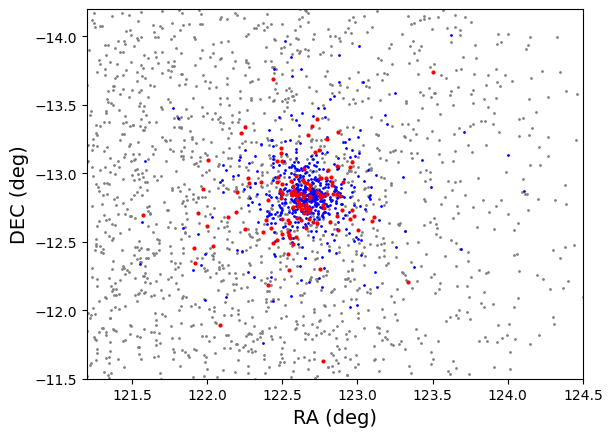

In [47]:
fig, ax = plt.subplots()

ax.scatter(p4.RAJ2000, p4.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4.iloc[matched_idx_catalog1].RAJ2000, p4.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [48]:
dfvg_t = len(dfvg)
p4_t = len(p4.iloc[matched_idx_catalog1])

Completeness


In [49]:
p4_c = p4_t /dfvg_t
p4_c*100

20.30534351145038

Pureness

In [50]:
p4_p = p4_t/len(p4)
p4_p*100

5.553235908141962

### Population 5

In [51]:
ra1 = p5.RAJ2000
dec1 = p5.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [52]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [53]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [54]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [55]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [56]:
p5.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
288,123.708779,-13.305395,-2.255,-0.542,15.023931,0.814781,0.7145,4
516,124.003075,-13.136115,-2.335,-0.494,15.850763,0.962978,0.7899,4
740,123.431666,-13.095293,-2.427,-0.443,15.969254,1.027783,0.7861,4
787,123.043233,-12.945078,-2.231,-0.396,17.511995,1.463987,0.7090,4
797,123.305812,-12.974520,-2.125,-0.474,16.040089,0.958479,0.6588,4
828,123.088701,-12.897080,-2.332,-0.655,15.979846,0.991024,0.7631,4
852,123.036500,-12.669740,-2.339,-0.557,16.284924,1.058140,0.7659,4
937,123.486356,-12.902880,-2.113,-0.694,16.779377,1.111711,0.7266,4
975,124.105766,-12.872159,-2.291,-0.531,10.635257,0.266273,0.7138,4
1155,123.318107,-12.582491,-2.386,-0.525,12.323744,0.401498,0.7592,4


In [57]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
116,5726467015152440448,123.708769,-13.305398,0.7145,-2.255,-0.542,15.023931,15.347285,14.532504,NGC_2539,...,0.0684,0.0642,0.0735,MARCS,123.708779,-13.305395,0.435173,0.405145,-0.2130,0.0
122,5726569132294876160,124.003064,-13.136117,0.7899,-2.335,-0.494,15.850763,16.226065,15.263086,NGC_2539,...,0.0215,0.0117,0.0310,MARCS,124.003075,-13.136115,0.614426,0.598159,-0.2495,0.0
47,5726673581603843712,123.431655,-13.095295,0.7861,-2.427,-0.443,15.969254,16.398594,15.370810,NGC_2539,...,0.1300,0.1230,0.1380,MARCS,123.431666,-13.095293,0.744553,0.767679,-0.3983,0.0
656,5726722720326100352,123.043222,-12.945080,0.7090,-2.231,-0.396,17.511995,18.194534,16.730547,NGC_2539,...,0.0959,0.0813,0.1137,MARCS,123.043233,-12.945078,1.581261,1.735275,-0.3759,0.0
205,5726725366026295168,123.305803,-12.974522,0.6588,-2.125,-0.474,16.040089,16.439684,15.481205,NGC_2539,...,0.0089,0.0026,0.0181,MARCS,123.305812,-12.974520,0.664990,0.659542,-0.2887,0.0
804,5726740896627670784,123.088690,-12.897083,0.7631,-2.332,-0.655,15.979846,16.394346,15.403322,NGC_2539,...,0.0614,0.0467,0.0730,MARCS,123.088701,-12.897080,0.651060,0.626487,-0.1935,0.0
817,5726748898150982400,123.036490,-12.669743,0.7659,-2.339,-0.557,16.284924,16.733465,15.675325,NGC_2539,...,0.0432,0.0305,0.0567,PHOENIX,123.036500,-12.669740,0.843322,0.798605,-0.2918,0.0
674,5726773194781445760,123.486347,-12.902883,0.7266,-2.113,-0.694,16.779377,17.258663,16.146952,NGC_2539,...,0.0048,0.0010,0.0121,PHOENIX,123.486356,-12.902880,0.970272,0.922368,-0.1268,0.0
970,5726784842733635456,124.105756,-12.872161,0.7138,-2.291,-0.531,10.635257,10.727135,10.460862,NGC_2539,...,0.2121,0.2098,0.2146,A,124.105766,-12.872159,0.451136,0.546504,-0.3203,0.0
527,5726841398861736960,123.318096,-12.582493,0.7592,-2.386,-0.525,12.323744,12.469339,12.067842,NGC_2539,...,0.1217,0.1197,0.1238,MARCS,123.318107,-12.582491,0.251420,0.244050,-0.2326,0.0


(121.2, 124.5)

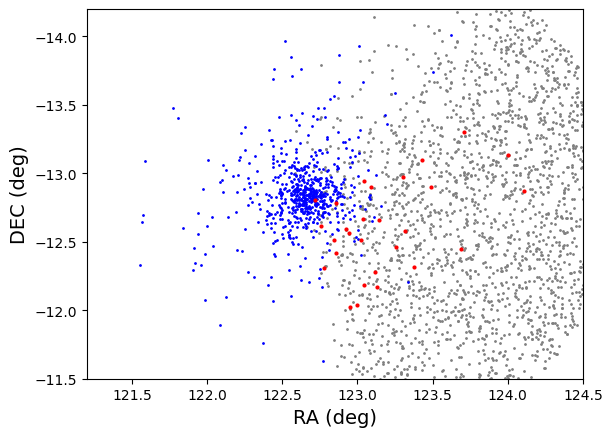

In [58]:
fig, ax = plt.subplots()

ax.scatter(p5.RAJ2000, p5.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p5.iloc[matched_idx_catalog1].RAJ2000, p5.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [59]:
dfvg_t = len(dfvg)
p5_t = len(p5.iloc[matched_idx_catalog1])

Completeness


In [60]:
p5_c = p5_t /dfvg_t
p5_c*100

4.2748091603053435

Pureness

In [61]:
p5_p = p5_t/len(p5)
p5_p*100

1.2466607301869992

## Analyzing

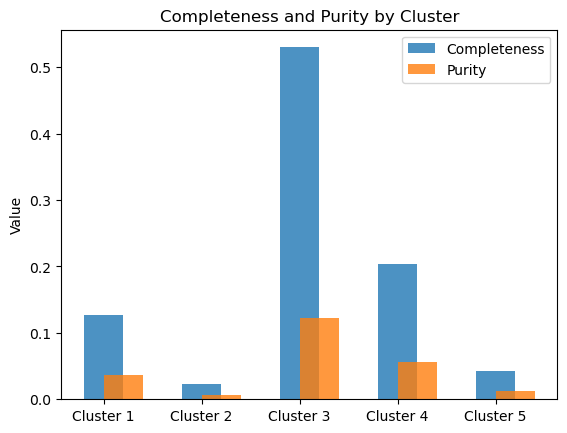

In [62]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_c, p2_c, p3_c, p4_c, p5_c]  # Exemplo de completude
purity = [p1_p, p2_p, p3_p, p4_p, p5_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()

In [122]:
ra1 = p1_2p.RA_ICRS
dec1 = p1_2p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [123]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [124]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [125]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [126]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [127]:
p1_2p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
729,123.007680,-13.927760,5724918868422661120,0.0225,0.0210,0.8103,0.0328,2.498,-2.426,0.033,...,15.580099,15.963792,15.036696,0.927096,NaN,-32.997611,123.007691,-13.927758,0.852579,0
1197,122.876573,-13.863225,5725107915705369984,0.0249,0.0203,0.8040,0.0383,2.409,-2.290,0.041,...,15.763227,16.162367,15.196784,0.965583,NaN,-32.968078,122.876584,-13.863222,0.846286,0
1218,122.516375,-13.965907,5725113481983114240,0.0463,0.0348,0.7145,0.0745,2.281,-2.239,0.069,...,17.050293,17.589607,16.384487,1.205120,NaN,-33.156968,122.516385,-13.965905,0.744836,0
1240,122.556156,-13.847291,5725116849237274752,0.0244,0.0198,0.7071,0.0384,2.272,-2.152,0.035,...,15.925107,16.289055,15.386557,0.902498,NaN,-33.032424,122.556166,-13.847287,0.748479,0
1270,122.623225,-13.760115,5725126401244507904,0.0488,0.0377,0.7557,0.0697,2.415,-2.357,0.069,...,17.152250,17.761162,16.422697,1.338465,NaN,-32.931504,122.623236,-13.760112,0.785536,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,121.986992,-12.075530,5727777839175515520,0.0126,0.0085,0.7857,0.0186,2.512,-2.378,0.019,...,14.231053,14.491918,13.813985,0.677933,32.14,-31.456736,121.987003,-12.075527,0.828046,0
6430,122.125904,-12.096970,5727779797680542464,0.0141,0.0096,0.7248,0.0215,2.197,-2.163,0.022,...,14.497416,14.759340,14.081089,0.678251,34.35,-31.443894,122.125913,-12.096969,0.767314,0
6507,122.084503,-11.893047,5727798523739919360,0.0471,0.0336,0.7568,0.0697,2.383,-2.357,0.069,...,17.198061,17.843935,16.455805,1.388130,NaN,-31.256342,122.084513,-11.893045,0.785921,0
6815,122.369838,-11.763095,5727883426649794560,0.0098,0.0077,0.7174,0.0149,2.419,-2.345,0.015,...,13.256223,13.424639,12.966224,0.458415,NaN,-31.061217,122.369849,-11.763092,0.759958,0


In [128]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
1029,5724918868422661120,123.007680,-13.927760,0.8103,-2.426,-0.595,15.580099,15.963792,15.036696,NGC_2539,1.00
1022,5725107915705369984,122.876573,-13.863225,0.8040,-2.290,-0.747,15.763227,16.162367,15.196784,NGC_2539,0.98
971,5725113481983114240,122.516375,-13.965907,0.7145,-2.239,-0.433,17.050293,17.589607,16.384487,NGC_2539,0.74
967,5725116849237274752,122.556156,-13.847291,0.7071,-2.152,-0.728,15.925107,16.289055,15.386557,NGC_2539,0.83
961,5725126401244507904,122.623225,-13.760115,0.7557,-2.357,-0.526,17.152250,17.761162,16.422697,NGC_2539,0.96
...,...,...,...,...,...,...,...,...,...,...,...
264,5727777839175515520,121.986992,-12.075530,0.7857,-2.378,-0.808,14.231053,14.491918,13.813985,NGC_2539,1.00
290,5727779797680542464,122.125904,-12.096970,0.7248,-2.163,-0.385,14.497416,14.759340,14.081089,NGC_2539,1.00
704,5727798523739919360,122.084503,-11.893047,0.7568,-2.357,-0.348,17.198061,17.843935,16.455805,NGC_2539,0.87
399,5727883426649794560,122.369838,-11.763095,0.7174,-2.345,-0.596,13.256223,13.424639,12.966224,NGC_2539,1.00


(121.2, 124.5)

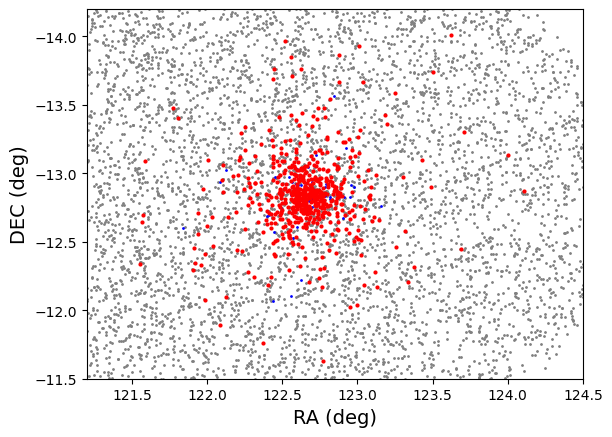

In [129]:
fig, ax = plt.subplots()

ax.scatter(p1_2p.RA_ICRS, p1_2p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_2p.iloc[matched_idx_catalog1].RA_ICRS, p1_2p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [130]:
dfvg_t = len(dfvg)
p1_2p_t = len(p1_2p.iloc[matched_idx_catalog1])

Completeness


In [131]:
p1_2p_c = p1_2p_t /dfvg_t
p1_2p_c*100

90.99236641221374

Pureness

In [132]:
p1_2p_p = p1_2p_t/len(p1_2p)
p1_2p_p*100

7.763449264035431

In [133]:
ra1 = p2_2p.RA_ICRS
dec1 = p2_2p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [134]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [135]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [136]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [137]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [138]:
p2_2p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
2574,122.921398,-13.185993,5726694747202461312,0.0559,0.0568,0.6139,0.0780,2.329,-2.260,0.084,...,17.271206,17.964739,16.480680,1.484058,NaN,-32.302333,122.921408,-13.185990,0.643280,1
2589,122.425772,-13.241586,5726702409422712192,0.0697,0.0536,0.6523,0.1068,2.509,-2.426,0.105,...,17.896448,18.671953,17.053247,1.618706,NaN,-32.478802,122.425783,-13.241584,0.679101,1
2608,122.595976,-13.031000,5726711690850248704,0.0512,0.0407,0.6404,0.0811,2.347,-2.301,0.074,...,17.062359,17.641851,16.351288,1.290564,NaN,-32.233123,122.595987,-13.030998,0.670546,1
3142,122.547817,-12.972002,5727463511987435904,0.0968,0.0712,0.6307,0.1485,2.331,-2.296,0.147,...,18.121515,18.958378,17.246717,1.711660,NaN,-32.187922,122.547828,-12.972000,0.656476,1
3145,122.621274,-12.911557,5727465612232588928,0.0736,0.0637,0.6394,0.1189,2.387,-2.359,0.114,...,17.720638,18.434364,16.915213,1.519152,NaN,-32.111331,122.621285,-12.911555,0.667010,1
3152,122.557252,-12.840559,5727469254364865024,0.0329,0.0251,0.6488,0.0458,2.485,-2.475,0.047,...,16.412067,16.879095,15.787485,1.091610,NaN,-32.058422,122.557264,-12.840558,0.681092,1
3154,122.493979,-12.845428,5727469765460098560,0.1364,0.1081,0.6333,0.2040,2.351,-2.272,0.194,...,18.827095,19.748213,17.843770,1.904444,NaN,-32.078703,122.493990,-12.845425,0.655229,1
3205,122.690985,-12.804562,5727490145085719936,0.0655,0.0594,0.6499,0.0940,2.421,-2.346,0.095,...,17.579407,18.285118,16.796236,1.488882,NaN,-31.990612,122.690996,-12.804559,0.678229,1
3209,122.719631,-12.805480,5727491588194718336,0.0588,0.0519,0.6471,0.0780,2.373,-2.327,0.083,...,17.026710,17.570848,16.323402,1.247446,NaN,-31.984422,122.719641,-12.805478,0.677407,1
3213,122.624003,-12.807470,5727492859505082624,0.0467,0.0391,0.6429,0.0652,2.367,-2.307,0.069,...,17.027517,17.609938,16.332210,1.277727,NaN,-32.009957,122.624013,-12.807467,0.673165,1


In [139]:
dfvg.iloc[matched_idx_catalog2]

,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Cluster,Pmemb
321,5726694747202461312,122.921398,-13.185993,0.6139,-2.260,-0.563,17.271206,17.964739,16.480680,NGC_2539,0.78
307,5726702409422712192,122.425772,-13.241586,0.6523,-2.426,-0.640,17.896448,18.671953,17.053247,NGC_2539,0.73
297,5726711690850248704,122.595976,-13.031000,0.6404,-2.301,-0.463,17.062359,17.641851,16.351288,NGC_2539,0.90
481,5727463511987435904,122.547817,-12.972002,0.6307,-2.296,-0.400,18.121515,18.958378,17.246717,NGC_2539,0.71
574,5727465612232588928,122.621274,-12.911557,0.6394,-2.359,-0.363,17.720638,18.434364,16.915213,NGC_2539,0.72
557,5727469254364865024,122.557252,-12.840559,0.6488,-2.475,-0.222,16.412067,16.879095,15.787485,NGC_2539,0.91
863,5727469765460098560,122.493979,-12.845428,0.6333,-2.272,-0.604,18.827095,19.748213,17.843770,NGC_2539,0.70
714,5727490145085719936,122.690985,-12.804562,0.6499,-2.346,-0.597,17.579407,18.285118,16.796236,NGC_2539,0.96
812,5727491588194718336,122.719631,-12.805480,0.6471,-2.327,-0.465,17.026710,17.570848,16.323402,NGC_2539,0.96
790,5727492859505082624,122.624003,-12.807470,0.6429,-2.307,-0.527,17.027517,17.609938,16.332210,NGC_2539,0.96


(121.2, 124.5)

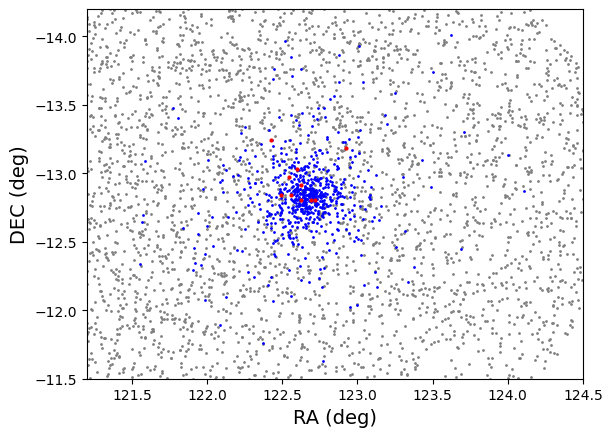

In [140]:
fig, ax = plt.subplots()

ax.scatter(p2_2p.RA_ICRS, p2_2p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_2p.iloc[matched_idx_catalog1].RA_ICRS, p2_2p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-11.5,-14.2)
ax.set_xlim(121.2,124.5)

In [141]:
dfvg_t = len(dfvg)
p2_2p_t = len(p2_2p.iloc[matched_idx_catalog1])

Completeness


In [142]:
p2_2p_c = p2_2p_t /dfvg_t
p2_2p_c*100

1.5267175572519083

Pureness

In [143]:
p2_2p_p = p2_2p_t/len(p2_2p)
p2_2p_p*100

0.21853146853146854